
# Summary: usecase sales dashboard with Jupyter Dash


<p>
<b>Notice:</b><br>
A live version is deposited on Binder.<br>
"Binder allows you to create custom computing environments that can be shared and used by many remote users."<br>
This allows to see the Dash apps create in the notebooks locally in your browser.<br>
Jumpt directly to Binder for running the code of the repository:
<a href="https://mybinder.org/v2/gh/RolfChung/usecase_sales_dashboard_plotly_dash/HEAD" target="_blank">usecase_sales_dashboard</a> 
</p>

<p>
Dash made a great job bringing Dash to Jupyter.<br>
Normally you would develop and start Dash from an IDE and the command line.<br>
As this project is a demonstration of Dash capabilities JupyterDash was chosen.<br>
The JupyterDash has different modes of presentation: inline, jupyter lab, external.<br>
The repository here uses inline and external.<br>
In external mode a link is created at the end of the notebook. This outputsthe Dash app into a website.<br>
However Github does not allow to start Dash apps from notebooks right now.<br>
That is a reason a Binder version of this repository was created.<br>
One last word: <b>Dash needs Javascript to be installed on the machine to work.</b>
</p>

<p>
This is a use case for Plotly Dash.<br>
It creates a sales dashboard for world wide e-commerce data.<br>
According to Wordnik a dashboard is <br>
"a user interface on a computer display that presents constantly updated information, such as processing speed, in a format that resembles the dashboard of a vehicle."<br>
This sales dashboard is intuitively understandable.    
<p>

<p>
On a technical level this project applies Plotly and JupyterDash for data visualization and web deployment.<br>
It is also applying HTML and CSS to structure and style the dashboard.
</p>

<p>
This notebook is part of larger project consisting of a portfolio of notebooks testing out different versions of the sales dashboard.<br>
This notebook is for importing and cleaning the data.<br>
The cleaned data can immediately used in the JupyterDash notebooks.<br>
It is followed up by another project adding interactivity to the sales dashboard.<br>
Then users can get particular information by sliding or klicking on graphic elements.<br>
</p>



<hr width=”300″, size=5> 

# Importing packages

In [1]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os
import sys


### Plotly

In [2]:
import ipywidgets

In [3]:

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly.offline.init_notebook_mode(connected=True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
import plotly.offline as pyo
#pyo.init_notebook_mode()

#import plotly.io as pio
print(pio.renderers)

pio.renderers.default = 'jupyterlab'


plotly.offline.init_notebook_mode(connected=True)

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



#### Node.js
<p>
Do not forget to install node.js on your machine and in the env.<br>
Otherwise inline plotly plots will not render.<br>
https://jupyterlab.readthedocs.io/en/stable/user/extensions.html#using-the-extension-manager
</p>

### Testing Plotly within JupyterLab
<p>Plotly works!</p>


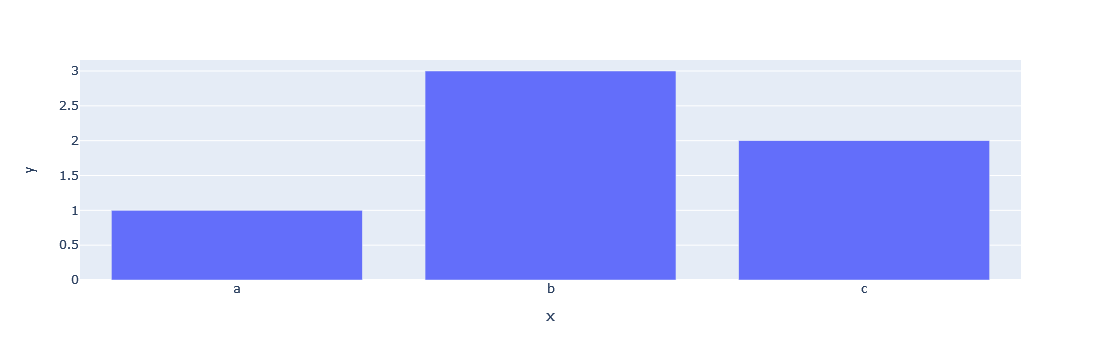

In [4]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

#### Checking current working directory

In [5]:
# %%cmd
# cd

cwd=os.getcwd()
# print(cwd)

In [6]:
#### Checking versions

!python --version
!conda --version

print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Seaborn {}".format(sns.__version__))
print("Plotly {}".format(plotly.__version__))

Python 3.10.0
conda 4.12.0
Pandas: 1.4.1
Numpy: 1.21.5
Seaborn 0.11.2
Plotly 5.6.0


### Creating an requirements file

In [7]:
%%capture
%%cmd 
mkdir txt

In [8]:
!conda list > txt/requirements_dash_dashboards_plotly.txt
!jupyter --version > txt/jupyter_version_plotly.txt

<hr width=”300″, size=5> 

# Importing the data
### Importing dataset 1

In [9]:
ecom = pd.read_csv("csv/ecom_sales.csv")


### Exploring & cleaning dataset 1

In [10]:
ecom.shape

(500, 6)

In [11]:
ecom.columns.tolist()

['InvoiceNo', 'Description', 'OrderValue', 'Quantity', 'CustomerID', 'Country']

In [12]:
ecom.dtypes

InvoiceNo        int64
Description     object
OrderValue     float64
Quantity         int64
CustomerID     float64
Country         object
dtype: object

In [13]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    500 non-null    int64  
 1   Description  500 non-null    object 
 2   OrderValue   500 non-null    float64
 3   Quantity     500 non-null    int64  
 4   CustomerID   399 non-null    float64
 5   Country      500 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 23.6+ KB


In [14]:
ecom.head()

,InvoiceNo,Description,OrderValue,Quantity,CustomerID,Country
0,549185,PACK OF 20 NAPKINS PANTRY DESIGN,10.20,12,18272.0,United Kingdom
1,576381,NATURAL SLATE HEART CHALKBOARD,35.40,12,12839.0,United Kingdom
2,551192,36 PENCILS TUBE SKULLS,20.00,16,16188.0,United Kingdom
3,573553,SET 6 SCHOOL MILK BOTTLES IN CRATE,7.46,1,NaN,United Kingdom
4,539436,FINE WICKER HEART,2.51,1,NaN,United Kingdom


In [15]:
ecom.tail()

,InvoiceNo,Description,OrderValue,Quantity,CustomerID,Country
495,564087,36 PENCILS TUBE WOODLAND,20.0,16,NaN,Hong Kong
496,553148,PACK OF 60 MUSHROOM CAKE CASES,13.2,24,NaN,Hong Kong
497,564087,RETROSPOT HEART HOT WATER BOTTLE,29.7,6,NaN,Hong Kong
498,553148,BLUE POLKADOT CUP,27.2,32,NaN,Hong Kong
499,564087,RED RETROSPOT BOWL,20.0,16,NaN,Hong Kong


In [16]:
ecom.describe()

,InvoiceNo,OrderValue,Quantity,CustomerID
count,500.000000,500.000000,500.000000,399.000000
mean,558862.054000,33.837280,22.344000,13815.170426
std,13158.304093,65.845703,69.718656,1833.574276
min,536370.000000,0.290000,1.000000,12388.000000
25%,547043.500000,8.500000,3.000000,12553.000000
50%,559307.500000,15.600000,9.000000,12683.000000
75%,569900.000000,27.200000,18.000000,15124.000000
max,581492.000000,633.600000,1152.000000,18287.000000


In [17]:
ecom.fillna(value=0, inplace=True)

In [18]:
ecom.isnull().sum()

InvoiceNo      0
Description    0
OrderValue     0
Quantity       0
CustomerID     0
Country        0
dtype: int64

### Importing dataset 2

<p>
Unfortunately the data exists only as text file and not as csv files.<br>
It needs some preparation.
</p>

<p>
At first the 'United Kingdom'is replace with 'UnitedKingdom' to make the import into a df more easy.
<br>
<a href="https://pythonexamples.org/python-replace-string-in-file/#:~:text=To%20replace%20a%20string%20in%20File%20using%20Python%2C,file.%204%20Close%20both%20input%20and%20output%20files." target="_blank">Python – How to Replace String in File?</a> 
</p>

In [19]:
fin = open('txt/ecom_totalsales.txt', 'rt')
fout = open('txt/out.txt','wt')

for line in fin:
    fout.write(line.replace('United Kingdom', 'UnitedKingdom').\
               replace('Hong Kong', 'HongKong'))

fin.close()
fout.close()

In [20]:
with open('txt/out.txt' ,'r') as file:
    text= file.read()

# print(text)

### Split the output file into columns

In [21]:
f = open("txt/out.txt", 'r')

In [22]:
data = f.read()

In [23]:
rows = data.split('\n')

In [24]:
index_col =[]
date_col=[]
country_col=[]
sales_col=[]

for row in rows:
    values=row.split()
    # print(values)
    
    index = values[0]
    date = values[1]
    country = values[2]
    sales = values[3]
    
    index_col.append(index)
    date_col.append(date)
    country_col.append(country)
    sales_col.append(sales)

In [25]:
# sales_col
# country_col
# date_col
index_col[:5]

['Index', '0', '1', '2', '3']

In [26]:
zipper = zip(index_col, date_col, country_col, sales_col)
zipper

In [27]:
total_sales = pd.DataFrame(zipper)

In [28]:
total_sales.shape

(57, 4)

### Exploring  & cleaning dataset 2

In [29]:
# total_sales

In [30]:
total_sales.columns = ['Index', 'Year-Month', 'Country', 'Total_Sales ($)']

In [31]:
total_sales.drop(0, inplace=True, axis=0)

In [32]:
total_sales.drop('Index', axis=1, inplace=True)

In [33]:
total_sales['Total_Sales ($)'] =  total_sales['Total_Sales ($)'].astype('float')

In [34]:
total_sales['Year-Month'] = pd.to_datetime(total_sales['Year-Month'], format='%Y-%m')

In [35]:
total_sales.shape

(56, 3)

In [36]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 1 to 56
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year-Month       56 non-null     datetime64[ns]
 1   Country          56 non-null     object        
 2   Total_Sales ($)  56 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ KB


In [37]:
total_sales.head()

,Year-Month,Country,Total_Sales ($)
1,2010-12-01,Australia,147.50
2,2010-12-01,France,128.33
3,2010-12-01,Germany,227.70
4,2010-12-01,UnitedKingdom,291.81
5,2011-01-01,Australia,471.30


In [38]:
total_sales.isnull().sum()

Year-Month         0
Country            0
Total_Sales ($)    0
dtype: int64

In [39]:
total_sales.describe()

,Total_Sales ($)
count,56.000000
mean,399.730893
std,285.029991
min,15.000000
25%,183.375000
50%,368.210000
75%,576.502500
max,1360.700000


<hr width=”300″, size=5> 

### Importing data set 3

<p>
This is the full data set stored in a xlsx file encode with Notepad++.<br>
This data set needs the "openpyxl" for proper import.
</p>

In [40]:
ecom_full = pd.read_excel("csv/Online Retail.xlsx", sheet_name='Online Retail')

In [41]:
ecom_full.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


### Exploring & cleaning dataset 3

In [42]:
ecom_full.shape

(541909, 8)

In [43]:
ecom_full.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [44]:
ecom_full.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


#### Converting str col to int

<p>Invoice number is converted to int.<br>
Problem: 9287 vales are starting with a character.<br>
These characters must be removed.<br>
Otherwise conversion is not possible.</p>

<p>
Below is an example of a value replacement with pandas subsetting.
</p>

In [45]:
ecom_full[ecom_full['InvoiceNo'] == 'C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom


In [46]:
ecom_full.iloc[141, 0]

'C536379'

In [47]:
ecom_full.iloc[141, 0] = 536379

In [48]:
ecom_full.iloc[141, 0]

536379

In [49]:
# 'C536379', 'C536383'

ecom_full_C=\
ecom_full['InvoiceNo'].astype(str).str.startswith('C')

ecom_full_C.sum()

9287

#### Replacing characters with Regex in 'InvoiceNo' before converting

In [50]:
ecom_full['InvoiceNo'] = \
ecom_full['InvoiceNo'].astype(str).str.replace("^[A-Z]", "", regex=True)


In [51]:
ecom_full['InvoiceNo'] = ecom_full['InvoiceNo'].astype(int)

#### Replacing characters with 0 in 'CustomerID' before converting

In [52]:
ecom_full['CustomerID'].fillna('0', inplace=True)
ecom_full['CustomerID'] = ecom_full['CustomerID'].astype(int)

In [53]:
ecom_full_desc_null = \
ecom_full[ecom_full['Description'].isnull()]

print(ecom_full_desc_null.shape)

(1454, 8)


#### Fill nan in Descrption col

In [54]:
ecom_full['Description'] = \
ecom_full['Description'].fillna('NoDescription')

#### Building a year month-col

In [55]:
ecom_full['year'] = \
ecom_full['InvoiceDate'].dt.year.astype(str)

ecom_full['month'] = \
ecom_full['InvoiceDate'].dt.month.astype(str)

In [56]:
ecom_full['year_month'] = ecom_full['year'].str.cat(ecom_full['month'], sep='-')
ecom_full['year_month'] = pd.to_datetime(ecom_full['year_month'])

In [57]:
ecom_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  int32         
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
 8   year         541909 non-null  object        
 9   month        541909 non-null  object        
 10  year_month   541909 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(2), int64(1), object(5)
memory usage: 41.3+ MB


In [58]:
ecom_full.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2010-12-01


In [59]:
ecom_full.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
year           0
month          0
year_month     0
dtype: int64

### Importing data set 4

<p>
This data set includes the categories.
</p>

In [60]:
f_2 = open('txt/categories.txt', 'r')

In [61]:
f_2

<_io.TextIOWrapper name='txt/categories.txt' mode='r' encoding='cp1252'>

In [62]:
data_2 = f_2.read()

In [63]:
data_2[:500]

'Index   Major_Category  Minor_Category  Total_Orders\n0         Clothes            Tops            63\n1         Clothes           Shoes            57\n2         Clothes            Hats            56\n3          Garden           Hoses            51\n4          Garden           Rakes            51\n5          Garden           Seeds            47\n6       Household           Lamps            47\n7       Household        Curtains            46\n8          Garden            Turf            40\n9       Househo'

In [64]:
rows_2 = data_2.split('\n')

In [65]:
index_2_column = []
major_category_column  = []
minor_category_column  = []
total_orders_column  = []

values_ttt = list()

for row in rows_2:
    values_2 = row.split()
    # print(len(values_2))
    # print(values_2) 
    #values_ttt.append(values_2)
    
    #print(values_ttt)
    
    index = values_2[0]
    major_category = values_2[1]
    minor_category = values_2[2]
    total_orders = values_2[3]
    
    index_2_column.append(index)
    major_category_column.append(major_category)
    minor_category_column.append(minor_category)
    total_orders_column.append(total_orders) 

#print(index_2_col)
#print(major_category_col)

In [66]:
print(len(major_category_column))
print(major_category_column[:5])

18
['Major_Category', 'Clothes', 'Clothes', 'Clothes', 'Garden']


In [67]:
zipper_2 = zip(index_2_column, major_category_column, minor_category_column, total_orders_column)
categories_df = pd.DataFrame(zipper_2)
categories_df.columns =categories_df.iloc[0, :]
categories_df.drop(0, axis=0, inplace=True)
categories_df.drop('Index', axis=1, inplace=True)

categories_df.head(2)

,Major_Category,Minor_Category,Total_Orders
1,Clothes,Tops,63
2,Clothes,Shoes,57


## Testing

<p>
the data integrity.
</p>

#### Test 1: plotting with plotly based on data

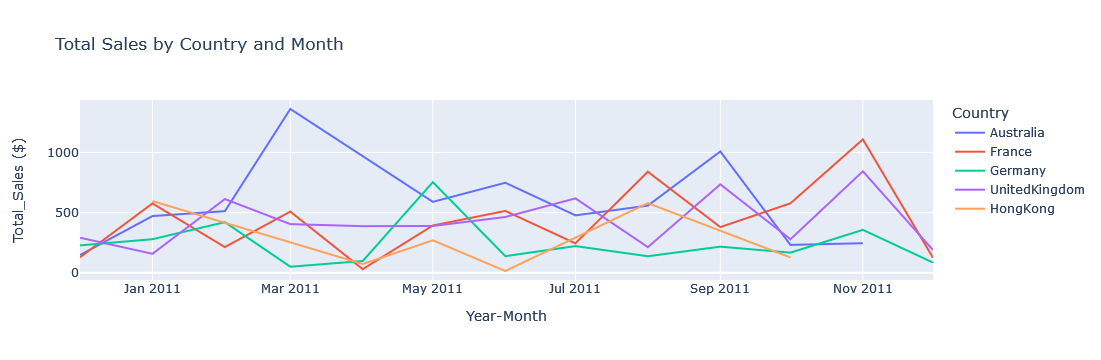

In [68]:
# Create the line graph
# Create the line graph
line_graph = px.line(
  # Set the appropriate DataFrame and title
  data_frame=total_sales, title='Total Sales by Country and Month', 
  # Set the x and y arguments
  x='Year-Month', y='Total_Sales ($)',
  # Ensure a separate line per country
  color='Country')

line_graph.show()

#### Test 2: Groupby

In [69]:
ecom_full_countrysum = ecom_full.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False)
ecom_full_countrysum

Country
United Kingdom          2245715.474
EIRE                      48447.190
France                    43031.990
Germany                   37666.000
Singapore                 25108.890
Portugal                  13037.540
Spain                     12633.450
Hong Kong                 12241.500
Belgium                    7540.130
Switzerland                6813.690
Norway                     6529.060
Netherlands                6492.550
Australia                  4054.750
Cyprus                     3920.070
Italy                      3879.390
Finland                    3786.850
Channel Islands            3738.550
Sweden                     1806.830
Austria                    1701.520
Poland                     1422.270
Denmark                    1266.950
Unspecified                1204.010
Israel                     1079.040
Canada                      910.580
Japan                       814.860
Greece                      713.290
Malta                       666.010
USA                 

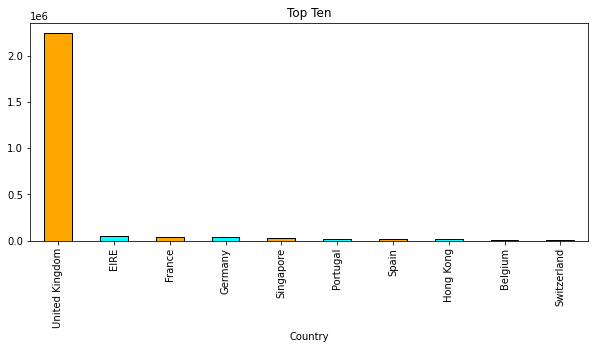

In [70]:
ecom_full_countrysum[:10].\
plot.bar(figsize=(10,4), edgecolor='black', color=['orange' , 'cyan'], title="Top Ten")
plt.show()

### Some group by's

In [71]:
agg_quantity = \
ecom_full.groupby(['year_month', 'Country'])['Quantity'].agg(sum)

agg_quantity.head()

year_month  Country        
2010-12-01  Australia           454
            Austria               3
            Bahrain              54
            Belgium            1755
            Channel Islands      80
Name: Quantity, dtype: int64

In [72]:
count_desc = \
ecom_full.groupby('Description')['StockCode'].count()

count_desc.info()
count_desc.head(3)

<class 'pandas.core.series.Series'>
Index: 4224 entries, 20713 to wrongly sold sets
Series name: StockCode
Non-Null Count  Dtype
--------------  -----
4224 non-null   int64
dtypes: int64(1)
memory usage: 66.0+ KB


Description
20713                               1
 4 PURPLE FLOCK DINNER CANDLES     41
 50'S CHRISTMAS GIFT BAG LARGE    130
Name: StockCode, dtype: int64

In [73]:
gb_year_month_agg_quantity = \
ecom_full.groupby(['year_month'])['Quantity'].agg(sum)

gb_year_month_agg_quantity.head()

year_month
2010-12-01    342228
2011-01-01    308966
2011-02-01    277989
2011-03-01    351872
2011-04-01    289098
Name: Quantity, dtype: int64

In [74]:
total_sales_gb_month = \
total_sales.groupby('Year-Month')['Total_Sales ($)'].agg('sum').sort_values(ascending=False)

total_sales_gb_month.head()

Year-Month
2011-11-01    2553.74
2011-05-01    2394.34
2011-09-01    2339.75
2011-08-01    2327.19
2011-03-01    2324.19
Name: Total_Sales ($), dtype: float64

#### Country with maximal sales

In [75]:
# country with maximal sales
max_country = \
total_sales.sort_values(by='Total_Sales ($)', ascending=False).iloc[0]['Country']

print(type(max_country))
print(max_country)

<class 'str'>
Australia


In [76]:
categories_df.value_counts(subset='Major_Category')

Major_Category
Kitchen      6
Garden       4
Household    4
Clothes      3
dtype: int64

In [77]:
print(sys.maxsize)
major_category = categories_df.groupby('Major_Category')['Total_Orders'].sum()
major_category = pd.DataFrame(major_category).reset_index(drop=False)
# major_category['Total_Orders']= major_category['Total_Orders'].astype(str).astype(int)

major_category['Total_Orders']= pd.to_numeric(major_category['Total_Orders'])

print(major_category)
print(major_category.info())

9223372036854775807
  Major_Category  Total_Orders
0        Clothes        635756
1         Garden      51514740
2      Household      47463931
3        Kitchen  333332252524
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Major_Category  4 non-null      object
 1   Total_Orders    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
None


#### Scaling of the Total_Orders column with the natural logarithm 
<p>
because the Kitchen value is so much higher than the other values.<br>
The differences between the categories are not recognizable.
</p>

In [78]:
#data['natural_log'] = np.log(data['Salary'])
major_category_log = major_category.copy()
major_category_log['Total_Orders'] = np.log(major_category_log['Total_Orders'])

major_category_log

,Major_Category,Total_Orders
0,Clothes,13.362570
1,Garden,17.757379
2,Household,17.675481
3,Kitchen,26.532406


## Writing cleaned pandas df to disk

In [79]:
%%capture
%%cmd

mkdir "csv/cleaned_df"

In [80]:
total_sales.to_csv("csv/cleaned_df/total_sales_cleaned.csv", index=False)

In [81]:
ecom_full.to_csv("csv/cleaned_df/ecom_full_cleaned.csv", index=False)

In [82]:
ecom.to_csv("csv/cleaned_df/ecom_cleaned.csv", index=False)

In [83]:
agg_quantity.to_csv("csv/cleaned_df/agg_quantity.csv", index=True)

In [84]:
ecom_full_countrysum.to_csv("csv/cleaned_df/ecom_full_countrysum.csv", index=True)

In [85]:
count_desc.to_csv("csv/cleaned_df/count_desc.csv", index=True)

In [86]:
total_sales_gb_month.to_csv("csv/cleaned_df/total_sales_gb_month.csv", index=True)

In [87]:
categories_df.to_csv("csv/cleaned_df/categories.csv", index=True)

In [88]:
major_category.to_csv("csv/cleaned_df/major_categories.csv", index=True)

In [89]:
major_category_log.to_csv("csv/cleaned_df/major_category_log.csv", index=True)